In [15]:
import numpy as np

In [16]:
X_train, X_test, y_train, y_test = np.load('../dataset/train/X_train.npy'), np.load('../dataset/test/X_test.npy'), np.load('../dataset/train/y_train.npy'), np.load('../dataset/test/y_test.npy')

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1134, 486, 1134, 486)

In [18]:
import keras
from keras import layers, models
from keras.models import Sequential

keras.utils.set_random_seed(812)
modelo = Sequential(
    [
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dense(16, activation='relu'),
        layers.Flatten(input_shape=(224, 224, 3)),
        layers.Dense(5, activation='softmax')

    ]
)

In [19]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [21]:
X_train.shape

(1134, 224, 224, 3)

In [22]:
y_train.shape

(1134, 5)

In [23]:
%time modelo.fit(X_train, y_train, epochs=25)

Epoch 1/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.2283 - loss: 1.5771
Epoch 2/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.4271 - loss: 1.4266
Epoch 3/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5134 - loss: 1.2781
Epoch 4/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6129 - loss: 1.0349
Epoch 5/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7063 - loss: 0.7897
Epoch 6/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7589 - loss: 0.6439
Epoch 7/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8318 - loss: 0.4487
Epoch 8/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8795 - loss: 0.3338
Epoch 9/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8740 - loss: 0.3310
Epoch 10/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8958 - loss: 0.3180
Epoch 11/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8965 - loss: 0.2859
Epoch 12/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9137 - lo

In [24]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26, 26, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │        54,085 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451,361 (1.72 MB)

 Trainable params: 150,453 (587.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 300,908 (1.15 MB)

In [25]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [26]:
y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_train

array([[[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]])

In [27]:
y_pred = modelo.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step


In [28]:
y_pred = np.round(y_pred)
y_pred

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [29]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)


# Se calcula la exactitud, precision, recall y f1 para cada clase
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")


print(f'Exactitud: {accuracy}')
print(f'Precisión por clase: {precision} -> {precision_avg}')
print(f'Sensibilidad por clase: {recall} -> {recall_avg}')
print(f'F1 Score por clase: {f1} -> {f1_avg}')

Exactitud: 0.8045267489711934
Precisión por clase: [0.74789916 0.81081081 0.75280899 0.92857143 0.80722892] -> 0.8094638606945601
Sensibilidad por clase: [0.82407407 0.83333333 0.74444444 0.86666667 0.74444444] -> 0.8025925925925925
F1 Score por clase: [0.78414097 0.82191781 0.74860335 0.89655172 0.77456647] -> 0.8051560654927702


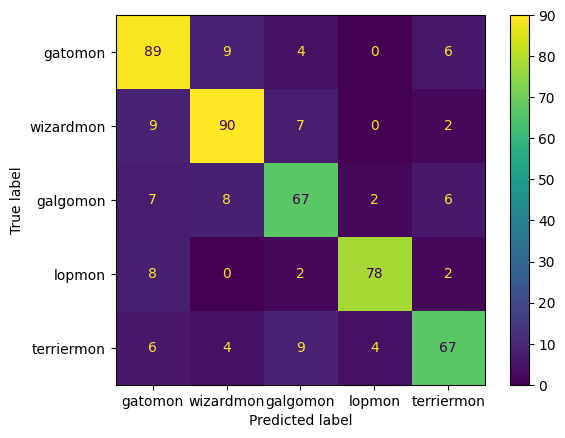

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['gatomon','wizardmon','galgomon','lopmon','terriermon']
disp.plot()

In [31]:
modelo.save('modelo_reconocimiento_digimon.h5')